# Supervised Learning Project
In this project I have used 9 supervised learning classifiers.

The data collected from the U.S. census to help CharityML (a fictitious charity organization) identify people most likely to donate to their cause. Here, we have to predict that if the income of a row is '<=50' or '>50'.

In [3]:
# importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
import visuals as vs

In [4]:
# loading the dataset
data = pd.read_csv('census.csv')
data.sample(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
19809,62,Private,Assoc-voc,11.0,Divorced,Sales,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
2007,63,Self-emp-inc,Masters,14.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,68.0,United-States,>50K
26996,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,8.0,United-States,<=50K
30351,45,Private,7th-8th,4.0,Married-civ-spouse,Craft-repair,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
33814,44,Private,HS-grad,9.0,Never-married,Other-service,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K


In [5]:
# total number of records 
n_records = data.shape[0]

# number of records where individual's income is atmost $50,000
n_greater_50k = data.income.value_counts()[1]

# number of records where individual's income is at most $50,000
n_at_most_50k = data.income.value_counts()[0]

# percentage of individual whose income is more than $50,000
greater_percent = n_greater_50k/float(n_greater_50k + n_at_most_50k)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 0.25%



## Feature set Exploration

age: continuous. <br>
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<br>
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br>
education-num: continuous. <br>
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. <br>
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br>
race: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other.<br>
sex: Female, Male.<br>
capital-gain: continuous.<br>
capital-loss: continuous.<br>
hours-per-week: continuous.<br>
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.<br>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


There are no missing values in the data

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45222.0,38.547941,13.217870,17.0,28.0,37.0,47.0,90.0
education-num,45222.0,10.118460,2.552881,1.0,9.0,10.0,13.0,16.0
capital-gain,45222.0,1101.430344,7506.430084,0.0,0.0,0.0,0.0,99999.0
capital-loss,45222.0,88.595418,404.956092,0.0,0.0,0.0,0.0,4356.0
hours-per-week,45222.0,40.938017,12.007508,1.0,40.0,40.0,45.0,99.0


In [8]:
# split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)


([<matplotlib.axis.YTick at 0x1da08ca1080>,
 <a list of 5 Text yticklabel objects>)

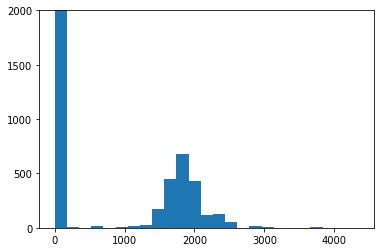

In [9]:
# plotting histogram of feature captial loss
plt.hist(data['capital-loss'],bins =25)
plt.ylim((0, 2000))
plt.yticks([0, 500, 1000, 1500, 2000])

([<matplotlib.axis.YTick at 0x1da08d81358>,
 <a list of 5 Text yticklabel objects>)

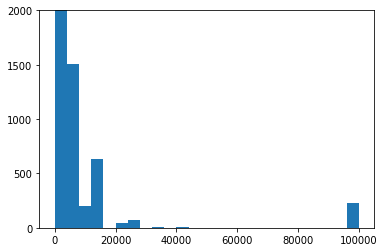

In [10]:
# plotting histogram of the feature capital gain
plt.hist(data['capital-gain'],bins =25)
plt.ylim((0, 2000))
plt.yticks([0, 500, 1000, 1500, 2000])

<p>A dataset may sometimes contain atleast one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number. Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. </p>

<p> Here, we have two such features, i.e 'capital-gain' and 'capital-loss'</p>

<p>For highly-skewed feature distributions such as 'capital-gain' and 'capital-loss', it is common practice to apply a logarithmic transformation on the data so that the very large and very small values do not negatively affect the performance of a learnong algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers.</p>

<p>However, care must be taken when applying this transformation as logarithm of 0 is undefined, so we must translate the values by a small amount above 0 to apply the logarithm successfully.

In [11]:
# Log transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x+1))

([<matplotlib.axis.YTick at 0x1da08e86588>,
 <a list of 5 Text yticklabel objects>)

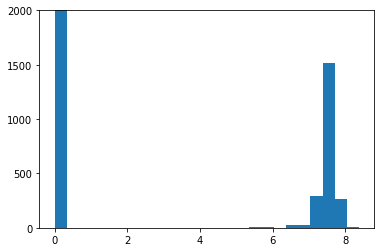

In [12]:
# plotting histogram of log transformed capital loss feature
plt.hist(features_log_transformed['capital-loss'],bins =25)
plt.ylim((0, 2000))
plt.yticks([0, 500, 1000, 1500, 2000])

([<matplotlib.axis.YTick at 0x1da08f20dd8>,
 <a list of 5 Text yticklabel objects>)

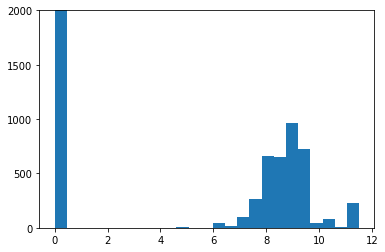

In [13]:
# plotting histogram of log transformed capital gain feature
plt.hist(features_log_transformed['capital-gain'],bins =25)
plt.ylim((0, 2000))
plt.yticks([0, 500, 1000, 1500, 2000])

## Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution; however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning

In [14]:
from sklearn.preprocessing import MinMaxScaler

# initialize a scaler, then apply it to features
scaler = MinMaxScaler()
numerical = ['age','education-num','capital-gain',\
            'capital-loss', 'hours-per-week']

# fitting the scaler 
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# show an example of a record with scaling applied
features_log_minmax_transform.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


## One hot encoding

Conversion of categorical variables into dummy variables

In [15]:
def preprocess_features(X):
    ''' Preprocesses the Dataframe by converting the categorical features
    into dummy variables and non-numeric binary variables into 0 or 1'''
    
    # initialize new output dataframe
    output = pd.DataFrame(index = X.index)
    
    # investigate each feature in column 
    for col, col_data in X.iteritems():
        
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
            
        output = output.join(col_data)
        
    return output

features_final = preprocess_features(features_log_minmax_transform)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))



103 total features after one-hot encoding.


In [16]:
income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)

In [17]:
print(encoded)

['age', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'education-num', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-manag

### Shuffle and Split Data

In [18]:
from sklearn.model_selection import train_test_split

# splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(\
features_final, income, test_size = 0.2, random_state = 0)

In [19]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


# Model Evaluation

#### 1. Naive Predictor Performance

If we chose a model that always predicted an individual made more than $50,000 , What would be the model's accuracy?

In [20]:
from sklearn.metrics import accuracy_score, recall_score,precision_score, fbeta_score

tp = n_greater_50k
tn = 0 # No predicted negatives on the naive case
fn = 0 # No predicted negatives in the naive case
fp = n_records - n_greater_50k

accuracy =tp/float(n_records)*100
recall = tp/float(tp+fn)
precision = tp/float(tp+fp)

print("Accuracy is {:.4f}".format(accuracy))
print("Recall is {}".format(recall))
print("Precision is {}".format(precision))
fscore = ((1 + (0.5)**2 ) * (precision * recall))/float(((0.5**2)*precision) + recall)
print("Fbeta score is {}".format(fscore))

Accuracy is 24.7844
Recall is 1.0
Precision is 0.2478439697492371
Fbeta score is 0.29172913543228385


## Supervised Learning Models

The following supervised learning models :
<ul>
    <li> Gaussian Naive Bayes (GaussianNB) </li>
    <li> Decision Trees </li>
    <li> Ensemble Methods ( Bagging, Adaboost, RandomForest, Gradient Boosting ) </li>
    <li> K-Nearest Neighbors ( KNeighbors) </li>
    <li> Stochastic Gradient Descent Classifier (SGDC) </li>
    <li> Support Vector Machines(SVM) </li>
    <li> Logistic Regression </li>
</ul>

In [21]:
data.describe()['age']

count    45222.000000
mean        38.547941
std         13.217870
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

In [22]:
from sklearn.metrics import accuracy_score, fbeta_score

def train_predict(learner,sample_size,X_train,y_train,X_test,y_test):
    '''
    inputs:
        -leaner: the learning algoritmn to be trained and predicted on
        -X_train,y_train,X_test,y_test
    '''
    
    results = {}
    # Fit the learner to the training data using slicing with 'sample size'
    # using fit(training_features[:,training_labels[:]])
    start = time() # getting the start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # getting the end time
    
    # calculate training time
    results['train_time'] = end - start 
    
    # get the predictions on the test set
    # then get the predictions on the first 300 training
    # samples using .predict()
    
    start = time() # get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # get end time
    
    # calculate the total prediction time
    results['pred_time'] = end - start
    
    # Compute accuracy on the first 300 training samples
    # which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
    
    # Compute accuracy on test set  
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300],predictions_train, beta = 0.5)
    
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test, beta = 0.5)
    
    print("{} trained on {} samples.".format(learner.__class__.__name__,sample_size))
    
    return results
    
    

In [23]:
# import supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
import visuals as vs

In [24]:
# initialising models
clf_nb = GaussianNB()
clf_rf = RandomForestClassifier()
clf_abc = AdaBoostClassifier()
clf_gbc = GradientBoostingClassifier()
clf_dt = DecisionTreeClassifier()
clf_lr = LogisticRegression()
clf_svm = SVC()
clf_sgdc = SGDClassifier()
clf_knn = KNeighborsClassifier()

AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.
SGDClassifier trained on 361 samples.
SGDClassifier trained on 3617 samples.
SGDClassifier trained on 36177 samples.


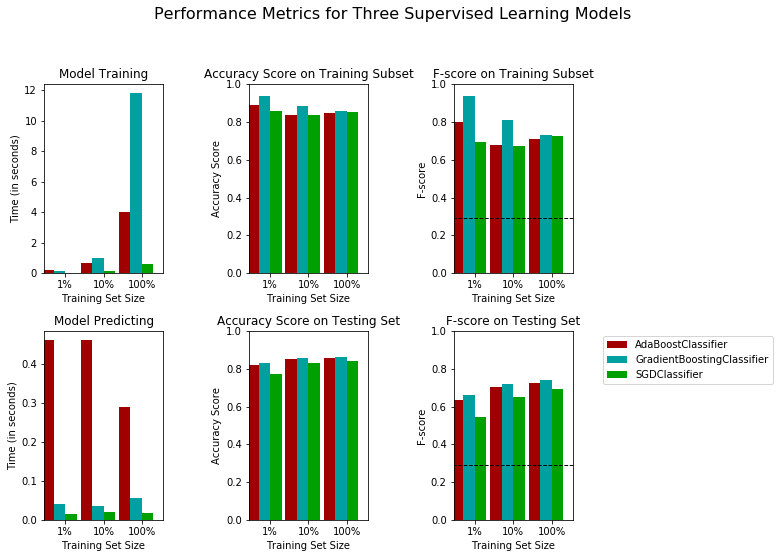

In [25]:
# calculate the number of samples for 1%, 10%, and 100% 
# of the training data
samples_100 = int(len(X_train))
samples_10 = int(len(X_train) * 0.1)
samples_1 =  int(len(X_train) * 0.01)

# collect results on the learners
results1 = {}

for clf in [clf_abc,clf_gbc,clf_sgdc]:
    clf_name = clf.__class__.__name__
    results1[clf_name] = {}
    for i, samples in enumerate([samples_1,samples_10,samples_100]):
        results1[clf_name][i] = \
        train_predict(clf,samples,X_train,y_train,X_test,y_test)
        
vs.evaluate(results1, accuracy, fscore)

SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.


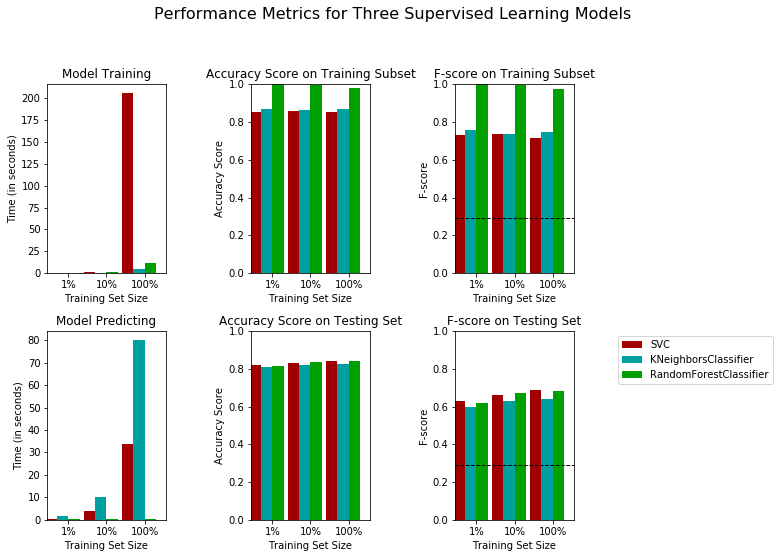

In [26]:
# calculate the number of samples for 1%, 10%, and 100% 
# of the training data
samples_100 = int(len(X_train))
samples_10 = int(len(X_train) * 0.1)
samples_1 =  int(len(X_train) * 0.01)

# collect results on the learners
results2 = {}

for clf in [clf_svm,clf_knn,clf_rf]:
    clf_name = clf.__class__.__name__
    results2[clf_name] = {}
    for i, samples in enumerate([samples_1,samples_10,samples_100]):
        results2[clf_name][i] = \
        train_predict(clf,samples,X_train,y_train,X_test,y_test)
        
vs.evaluate(results2, accuracy, fscore)

GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.


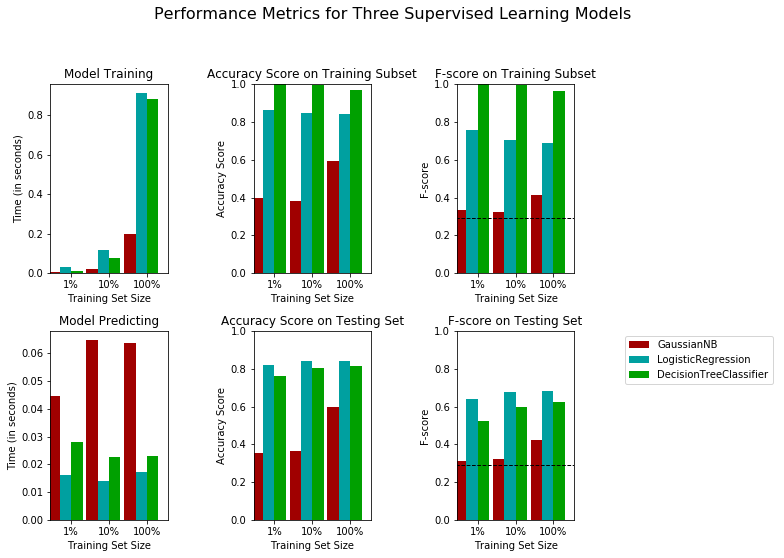

In [27]:
# calculate the number of samples for 1%, 10%, and 100% 
# of the training data
samples_100 = int(len(X_train))
samples_10 = int(len(X_train) * 0.1)
samples_1 =  int(len(X_train) * 0.01)

# collect results on the learners
results3 = {}

for clf in [clf_nb,clf_lr,clf_dt]:
    clf_name = clf.__class__.__name__
    results3[clf_name] = {}
    for i, samples in enumerate([samples_1,samples_10,samples_100]):
        results3[clf_name][i] = \
        train_predict(clf,samples,X_train,y_train,X_test,y_test)
        
vs.evaluate(results3, accuracy, fscore)

In [28]:
f_score_testing_full_training_data = {'GaussianNB':.42, 'RandomForestClassifier':.682, 'AdaBoostClassifier':.724,\
                                      'GradientBoostingClassifier':.74, 'DecisionTreeClassifier':.63, 'LogisticRegression':.683,\
                                     'SVC':.685, 'SGDClassifier':.686, 'KNeighborsClassifier':0.64}

We are choosing GradientBoostingClassifier as it has highest F-score on testing data when the models trains on full training data

## Model Tuning

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

clf = GradientBoostingClassifier(random_state = 28)

In [31]:
parameters = {'max_depth' : range(2,10,2),\
             'n_estimators' : [100,150,200]}

# make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta = 0.5)

# perform grid search on the classifier
grid_obj = GridSearchCV(estimator = clf, param_grid = parameters,scoring = scorer)

# fit the grid search object to the training data and find the optimal parameters using fit
grid_fit = grid_obj.fit(X_train,y_train)

# get the best estimator
best_clf = grid_fit.best_estimator_

# make predictions using the unoptimized and model
predictions = (clf.fit(X_train,y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))


Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8690
Final F-score on the testing data: 0.7495


### Feature Importance
While performing supervised learning on a dataset like this, it is crucial to determine the most important features. This simplifies our model. 

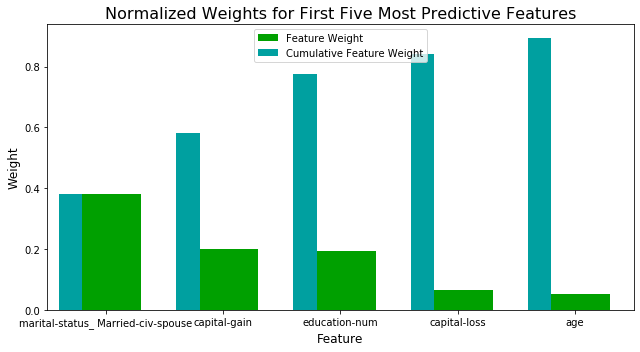

In [32]:
importances = best_clf.feature_importances_

vs.feature_plot(importances, X_train,y_train)

### Feature Selection
If we use less features to train model, the training and prediction time will be much lower, but at the cost of performance metrics.

From the visualization above, we see that the top 5 most important features contribute more than half of the importance of all features present in the data. Hence, we will attempt to make a model with these top 5 features. 

In [34]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances))[::-1][:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances))[::-1][:5]]]

# training on the best model found on grid search
clf = (clone(best_clf)).fit(X_train_reduced,y_train)

# making new predictions 
reduced_predictions = clf.predict(X_test_reduced)

# report scores from the final model using both versions
print("Final Model trained on the full data\n---------------")
print("Accuracy on the testing data: {:.4f}\n".format(accuracy_score(y_test,best_predictions)))
print("F-score on the testing data: {:.4f}\n".format(fbeta_score(y_test,best_predictions, beta=0.5)))
print("Final Model trained on reduced data\n----------------")
print("Accuracy on the testing data: {:.4f}\n".format(accuracy_score(y_test,reduced_predictions)))
print("F-score on testing data: {:.4f}\n".format(fbeta_score(y_test, reduced_predictions,beta=0.5)))

Final Model trained on the full data
---------------
Accuracy on the testing data: 0.8690

F-score on the testing data: 0.7495

Final Model trained on reduced data
----------------
Accuracy on the testing data: 0.8584

F-score on testing data: 0.7237

